In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import numpy as np

In [2]:
start = dt.datetime(1970, 1, 1)
end = dt.datetime.today()

df = pd.DataFrame()
df['Amazon'] = web.DataReader('AMZN', 'yahoo', start, end)['Adj Close']

daily_returns = df.pct_change()
daily_returns.head()

,Amazon
Date,
1997-05-15,NaN
1997-05-16,-0.117021
1997-05-19,-0.012048
1997-05-20,-0.042683
1997-05-21,-0.127388


<AxesSubplot:xlabel='Date'>

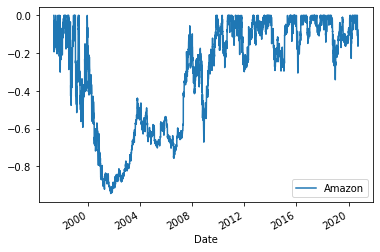

In [3]:
wealth_idx = 1 * (1 + daily_returns).cumprod()
previous_peaks = wealth_idx.cummax()
drawdown = (wealth_idx - previous_peaks)/previous_peaks
drawdown.plot()

In [41]:
mdd = drawdown.min()
print("Maximum Drawdown (MDD) over the entire period = {}".format(
    mdd.values[0].round(2)))

x = drawdown.idxmin().values[0]
x = pd.to_datetime(x)
print("The date of MDD = {}".format(str(x.date())))

Maximum Drawdown (MDD) over the entire period = -0.94
The date of MDD = 2001-09-28


In [42]:
startYear = '2005'
endYear = '2010'

mdd = drawdown[startYear:endYear].min()
print("Maximum Drawdown (MDD) over the entire period = {}".format(
    mdd.values[0].round(2)))

x = drawdown[startYear:endYear].idxmin().values[0]
x = pd.to_datetime(x)
print("The date of MDD = {}".format(str(x.date())))

Maximum Drawdown (MDD) over the entire period = -0.76
The date of MDD = 2006-08-11


In [45]:
startYear = '2020'

mdd = drawdown[startYear:].min()
print("Maximum Drawdown (MDD) over the entire period = {}".format(
    mdd.values[0].round(2)))

x = drawdown[startYear:].idxmin().values[0]
x = pd.to_datetime(x)
print("The date of MDD = {}".format(str(x.date())))

Maximum Drawdown (MDD) over the entire period = -0.23
The date of MDD = 2020-03-12


In [44]:
def compute_drawdown(return_series: pd.Series):
    wealth_idx = (1000 * (1 + return_series).cumprod()).round(2)
    previous_peaks = wealth_idx.cummax().round(2)
    drawdown = ((wealth_idx - previous_peaks)/previous_peaks).round(4)
    return pd.DataFrame({'Wealth': wealth_idx, 'Peak': previous_peaks,
                        'Drawdown': drawdown})


mdd = compute_drawdown(dailyReturns['Amazon'])
mdd['2018':'2019']

NameError: name 'dailyReturns' is not defined